In [1]:
import numpy as np
import pylab as p
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

P = np.loadtxt('tryckfalt.dat')  #30 x 31 matrix
U = np.loadtxt('vindfalt_u.dat') #30 x 31 matrix
V = np.loadtxt('vindfalt_v.dat') #30 x 31 matrix

X = np.linspace(-55*15.5,55*15.5,31)
Y = np.linspace(-55*15,55*15,30)
sp = np.sqrt(U*U + V*V)

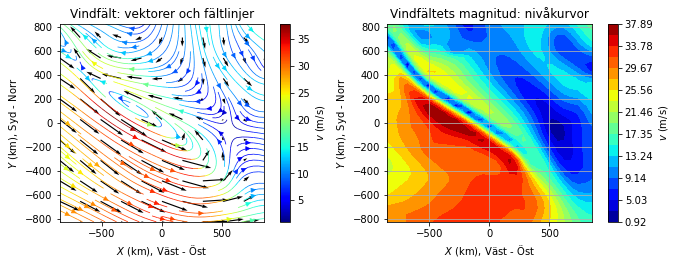

In [65]:
#Vindfältet
mX, mY = np.meshgrid(X,Y)
fig0 = p.figure(figsize=(10, 10))
p.subplots_adjust(wspace=0.42)
gs = gridspec.GridSpec(nrows=1, ncols=2)

###
ax0 = fig0.add_subplot(gs[0, 0])
st = ax0.streamplot(X, Y, U, V, density=1.25,\
    color=sp, cmap='jet', linewidth=0.75)
cb0 = fig0.colorbar(st.lines,fraction=0.043, pad=0.07)
cb0.set_label('$v$ (m/s)')
ax0.quiver(mX[::3, ::3], mY[::3, ::3], U[::3, ::3], V[::3, ::3], scale=250)
ax0.set_aspect('equal') 
ax0.set_title('Vindfält: vektorer och fältlinjer') 
ax0.set(xlabel= '$X$ (km), Väst - Öst', ylabel='$Y$ (km), Syd - Norr')

###
ax1 = fig0.add_subplot(gs[0, 1])
contf = ax1.contourf(X, Y, sp, cmap='jet',\
    levels=np.linspace(sp.min(), sp.max(), 19))
cb1 = fig0.colorbar(contf,fraction=0.043, pad=0.07)
cb1.set_label('$v$ (m/s)')
ax1.set_aspect('equal') 
ax1.set_title('Vindfältets magnitud: nivåkurvor') 
ax1.set(xlabel= '$X$ (km), Väst - Öst', ylabel='$Y$ (km), Syd - Norr')

p.grid()
p.show()
fig0.savefig('vindfalt.png')

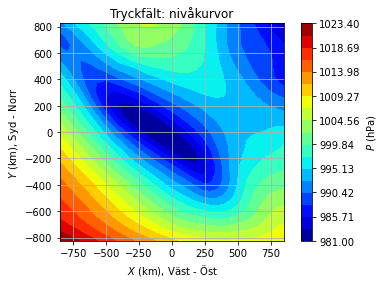

In [14]:
#Tryckfältet
fig0, ax0 = p.subplots()
contf = ax0.contourf(X, Y, P, cmap='jet',\
    levels=np.linspace(P.min(), P.max(), 19))
cb1=p.colorbar(contf)
cb1.set_label('$P$ (hPa)')

ax0.set_aspect('equal') 
ax0.set_title('Tryckfält: nivåkurvor') 
p.xlabel('$X$ (km), Väst - Öst')
p.ylabel('$Y$ (km), Syd - Norr')
p.grid()
p.show()


fig0.savefig('tryckfalt.png')

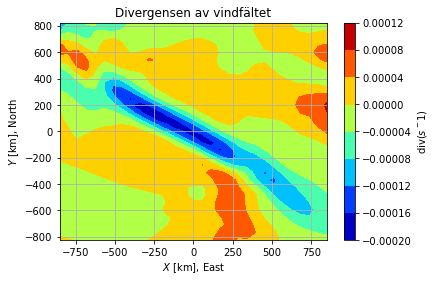

In [86]:
#Divergensen
W = [U,V]
num_dims_div = len(W)
# ~~ From stackoverflow: -- https://stackoverflow.com/questions/11435809/
div_W = np.ufunc.reduce(np.add, [np.gradient(W[i], axis=i) for i in range(num_dims_div)]) 

div_W_S = div_W/(55*10**(3))
fig0, ax0 = p.subplots()
ax0.set_title('Divergensen av vindfältet') 
contf = ax0.contourf(X, Y, div_W_S, cmap='jet')
cb1=p.colorbar(contf)
cb1.set_label('div($s^-1$)')
#'t$^-1$ [s$^-1$]'

p.xlabel('$X$ [km], East')
p.grid()
p.ylabel('$Y$ [km], North')
p.show()
fig0.savefig('div.png')

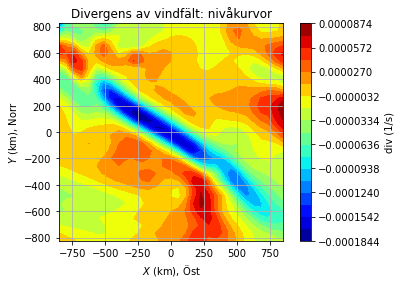

In [21]:
#Divergensen
W = [U,V]
dx = 55000
amountOfLevelCurves = 19
# ~~ From stackoverflow: -- https://stackoverflow.com/questions/11435809/
div_W = np.ufunc.reduce(np.add, [np.gradient(W[i], dx, axis=i) for i in range(2)]) 

fig0, ax0 = p.subplots()
contf = ax0.contourf(X, Y, div_W, cmap='jet',\
    levels=np.linspace(div_W.min(), div_W.max(), amountOfLevelCurves))
cb1=p.colorbar(contf)
cb1.set_label('div (1/s)')

ax0.set_aspect('equal') 
ax0.set_title('Divergens av vindfält: nivåkurvor') 
p.xlabel('$X$ (km), Öst')
p.ylabel('$Y$ (km), Norr')
p.grid()
p.show()
fig0.savefig('div.png')

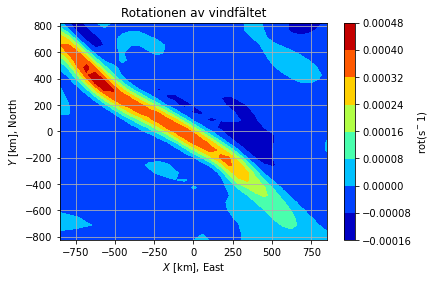

In [87]:
#Rotationen
W = [V,-U] 
num_dims_rot = len(W)
# ~~ From stackoverflow: -- https://stackoverflow.com/questions/11435809/
rot_W = np.ufunc.reduce(np.add, [np.gradient(W[i], axis=i) for i in range(num_dims_rot)]) 

rot_W_S = rot_W/(55*10**(3))
fig0, ax0 = p.subplots()
contf = ax0.contourf(X, Y, rot_W_S, cmap='jet')
ax0.set_title('Rotationen av vindfältet') 
cb1=p.colorbar(contf)
cb1.set_label('rot(s$^-1$)')

p.xlabel('$X$ [km], East')
p.grid()
p.ylabel('$Y$ [km], North')
p.show()
fig0.savefig('rot.png')

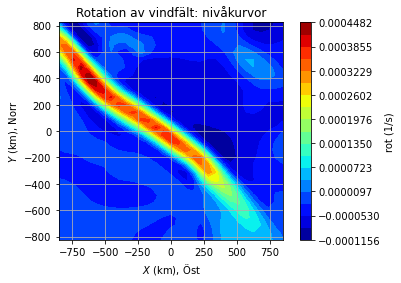

In [9]:
Q = [V,-U] 
dx = 55000
amountOfLevelCurves = 19
# ~~ From stackoverflow: -- https://stackoverflow.com/questions/11435809/
rot_Q = np.ufunc.reduce(np.add, [np.gradient(Q[i], dx,\
    axis=i) for i in range(2)]) 

fig0, ax0 = p.subplots()
contf = ax0.contourf(X, Y, rot_Q, cmap='jet',\
    levels=np.linspace(rot_Q.min(), rot_Q.max(), amountOfLevelCurves))
cb1=p.colorbar(contf)
cb1.set_label('rot (1/s)')

ax0.set_aspect('equal') 
ax0.set_title('Rotation av vindfält: nivåkurvor') 
p.xlabel('$X$ (km), Öst')
p.ylabel('$Y$ (km), Norr')
p.grid()
p.show()
fig0.savefig('rotA.png')